In [2]:
#Importing all the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV,ElasticNetCV,Lasso
from regressors import stats
from scipy.stats import ttest_ind

### Exploratory Data Analysis


In [7]:
#Importing data from the excel file
data = pd.read_excel('MPIAssignment.xlsx')

C:\Users\quizd\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [8]:
data.head()

,FID,Prov_ID,Province,Dist_ID,District,Sect_ID,Sector,nightlight_sum,landscan_pop,mpi_headcount,mpi_intensity,mpi
0,0,1,Kigali City,11,Nyarugenge,1101,Gitega,101.297202,30758,0.064,0.412,0.027
1,1,1,Kigali City,11,Nyarugenge,1102,Kanyinya,85.060422,19802,0.282,0.445,0.126
2,2,1,Kigali City,11,Nyarugenge,1103,Kigali,133.991142,26452,0.212,0.434,0.092
3,3,1,Kigali City,11,Nyarugenge,1104,Kimisagara,161.933015,62266,0.081,0.409,0.033
4,4,1,Kigali City,11,Nyarugenge,1105,Mageregere,49.415699,23144,0.369,0.430,0.159


In [9]:
#Identifying the features
features = data[['nightlight_sum','landscan_pop','mpi_headcount','mpi_intensity']]

Text(0.5, 1.0, 'Night light histogram')

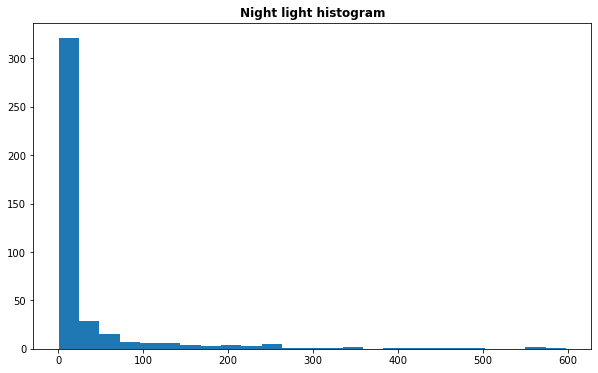

In [10]:
#Plotting the histogram for nightlife
plt.rcParams["figure.figsize"] = (10,6)
plt.hist(data['nightlight_sum'],bins = 25);
plt.title('Night light histogram',fontweight = 'bold')

Text(0.5, 1.0, 'landscan histogram')

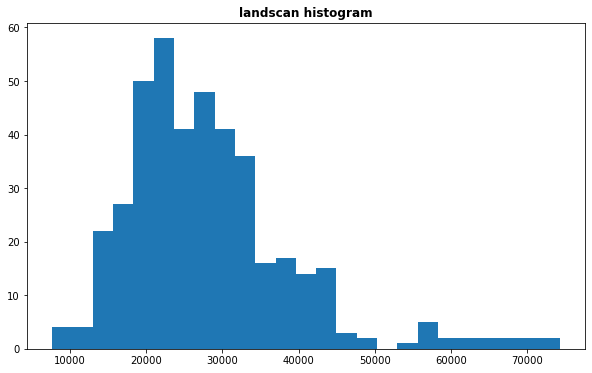

In [11]:
#Plotting the histogram for the landscan
plt.rcParams["figure.figsize"] = (10,6)
plt.hist(data['landscan_pop'],bins = 25);
plt.title('landscan histogram',fontweight = 'bold')

Text(0.5, 1.0, 'Headcount histogram')

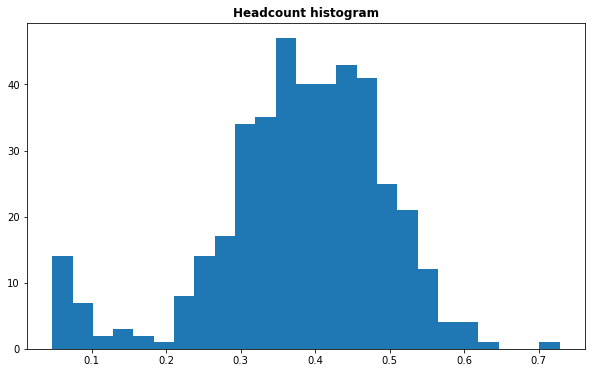

In [12]:
#plotting the histogram for the headcount
plt.rcParams["figure.figsize"] = (10,6)
plt.hist(data['mpi_headcount'],bins = 25);
plt.title('Headcount histogram',fontweight = 'bold')

Text(0.5, 1.0, 'MPI histogram')

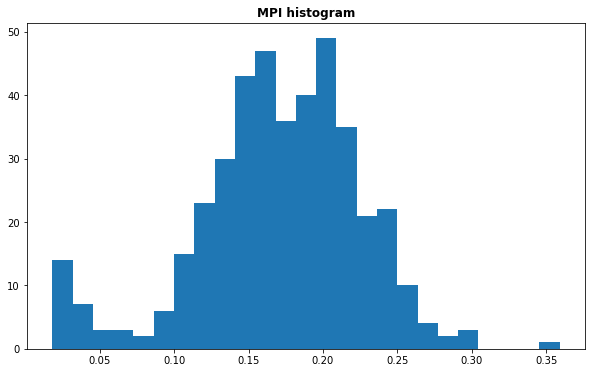

In [13]:
#Plotting the histogram for the MPI
plt.rcParams["figure.figsize"] = (10,6)
plt.hist(data['mpi'],bins = 25);
plt.title('MPI histogram',fontweight = 'bold')

Text(0.5, 1.0, 'MPI intensity histogram')

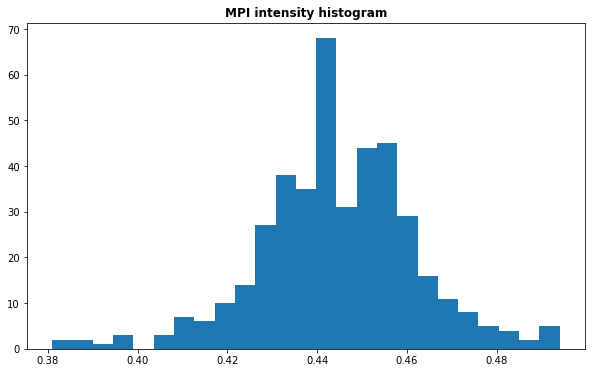

In [9]:
#plotting the histogram for MPI intensity
plt.rcParams["figure.figsize"] = (10,6)
plt.hist(data['mpi_intensity'],bins = 25);
plt.title('MPI intensity histogram',fontweight = 'bold')

### Exploring various correlations among features

Text(0, 0.5, 'Night light sum')

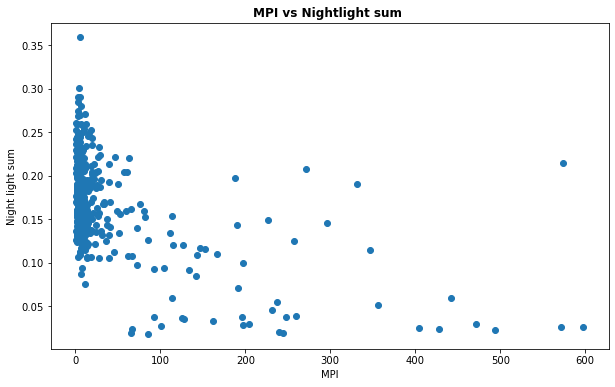

In [14]:
#correlation of MPI and Nightlight
plt.rcParams["figure.figsize"] = (10,6)
plt.scatter(data['nightlight_sum'],data['mpi'])
plt.title('MPI vs Nightlight sum ',fontweight = 'bold')
plt.xlabel('MPI')
plt.ylabel('Night light sum')

Text(0, 0.5, 'MPI headcount')

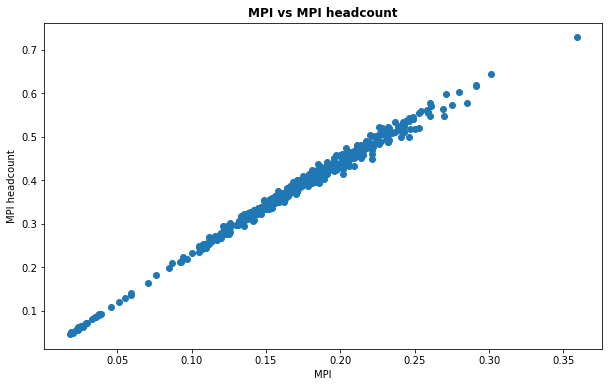

In [15]:
#Plotting the correlation of MPI and MPI headcount
plt.rcParams["figure.figsize"] = (10,6)
plt.scatter(data['mpi'],data['mpi_headcount'])
plt.title('MPI vs MPI headcount',fontweight = 'bold')
plt.xlabel('MPI')
plt.ylabel('MPI headcount')

Text(0, 0.5, 'MPI intensity')

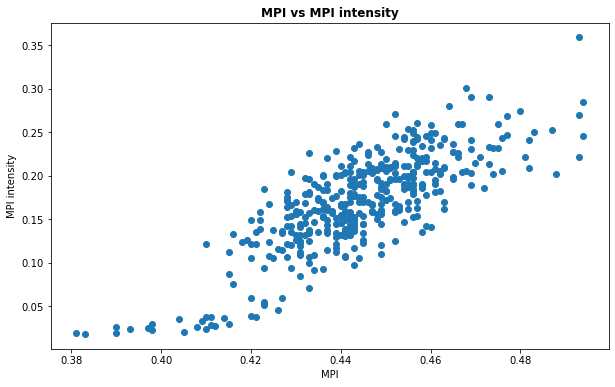

In [16]:
#plotting the correlation of MPI and MPI intensity
plt.rcParams["figure.figsize"] = (10,6)
plt.scatter(data['mpi_intensity'],data['mpi'])
plt.title('MPI vs MPI intensity',fontweight = 'bold')
plt.xlabel('MPI')
plt.ylabel('MPI intensity')

Text(0, 0.5, 'Population')

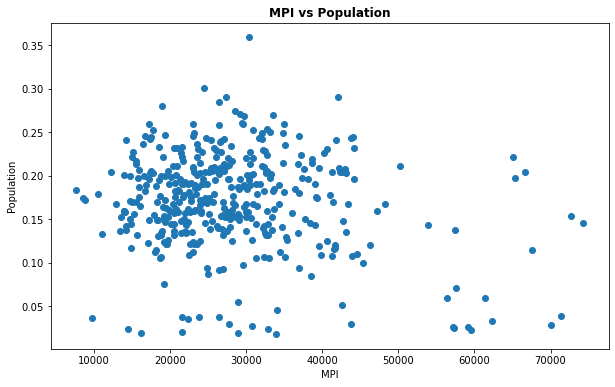

In [17]:
#Plotting the correlation of MPI and Population
plt.rcParams["figure.figsize"] = (10,6)
plt.scatter(data['landscan_pop'],data['mpi'])
plt.title('MPI vs Population',fontweight = 'bold')
plt.xlabel('MPI')
plt.ylabel('Population')

### Creating the table of correlations

In [18]:
list1 = []
#i
for i in features:
    list1.append(pd.Series.corr(data[i],data['mpi']))
    print('The correlation of mpi with'+i+': ',pd.Series.corr(data[i],data['mpi']))

The correlation of mpi withnightlight_sum:  -0.5283488215627704
The correlation of mpi withlandscan_pop:  -0.17278184955090173
The correlation of mpi withmpi_headcount:  0.9953781778518253
The correlation of mpi withmpi_intensity:  0.7998831131635528


In [19]:
list1

[-0.5283488215627704,
 -0.17278184955090173,
 0.9953781778518253,
 0.7998831131635528]

In [20]:
#ii
list2 = []
for i in features:
    list2.append(pd.Series.corr(np.log(data[i]),data['mpi']))
    print('The correlation of mpi with log '+i+': ',pd.Series.corr(np.log(data[i]),data['mpi']))

The correlation of mpi with log nightlight_sum:  -0.5758158012690007
The correlation of mpi with log landscan_pop:  -0.113587148729851
The correlation of mpi with log mpi_headcount:  0.922130693271593
The correlation of mpi with log mpi_intensity:  0.8034733734916467


In [21]:
list2

[-0.5758158012690007,
 -0.113587148729851,
 0.922130693271593,
 0.8034733734916467]

In [22]:
#iii
list3 = []
for i in features:
    list3.append(pd.Series.corr(data[i],np.log(data['mpi'])))
    print('The correlation of log mpi with'+i+': ',pd.Series.corr(data[i],np.log(data['mpi'])))

The correlation of log mpi withnightlight_sum:  -0.6389269687490735
The correlation of log mpi withlandscan_pop:  -0.2233421338720428
The correlation of log mpi withmpi_headcount:  0.9422003792915737
The correlation of log mpi withmpi_intensity:  0.7691127308364137


In [23]:
list3

[-0.6389269687490735,
 -0.2233421338720428,
 0.9422003792915737,
 0.7691127308364137]

In [24]:
#iv
list4 = []
for i in features:
    list4.append(pd.Series.corr(np.log(data[i]),np.log(data['mpi'])))
    print('The correlation of log mpi with log '+i+': ',pd.Series.corr(np.log(data[i]),np.log(data['mpi'])))

The correlation of log mpi with log nightlight_sum:  -0.6170780029712375
The correlation of log mpi with log landscan_pop:  -0.16011031369824708
The correlation of log mpi with log mpi_headcount:  0.9985073413337329
The correlation of log mpi with log mpi_intensity:  0.7818760495665169


In [25]:
list4

[-0.6170780029712375,
 -0.16011031369824708,
 0.9985073413337329,
 0.7818760495665169]

In [26]:
table = pd.DataFrame(columns = ['X vs y','log X vs y','X vs log y','log X vs log y'])

In [27]:
table['X vs y'] = list1
table['log X vs y'] = list2
table['X vs log y'] = list3
table['log X vs log y'] =list4


In [28]:
table.index = ['nightlight_sum','landscan_pop','mpi_headcount','mpi_intensity']

In [29]:
table = table.T

In [30]:
table.T['X vs y']

nightlight_sum   -0.528349
landscan_pop     -0.172782
mpi_headcount     0.995378
mpi_intensity     0.799883
Name: X vs y, dtype: float64

In [31]:
table.T['log X vs y']

nightlight_sum   -0.575816
landscan_pop     -0.113587
mpi_headcount     0.922131
mpi_intensity     0.803473
Name: log X vs y, dtype: float64

In [32]:
table.T['X vs log y']

nightlight_sum   -0.638927
landscan_pop     -0.223342
mpi_headcount     0.942200
mpi_intensity     0.769113
Name: X vs log y, dtype: float64

In [33]:
table.T['log X vs log y']

nightlight_sum   -0.617078
landscan_pop     -0.160110
mpi_headcount     0.998507
mpi_intensity     0.781876
Name: log X vs log y, dtype: float64

In [34]:
table

,nightlight_sum,landscan_pop,mpi_headcount,mpi_intensity
X vs y,-0.528349,-0.172782,0.995378,0.799883
log X vs y,-0.575816,-0.113587,0.922131,0.803473
X vs log y,-0.638927,-0.223342,0.942200,0.769113
log X vs log y,-0.617078,-0.160110,0.998507,0.781876


In [31]:
#i
data['nightlight_per_capita'] = data['nightlight_sum'] / data['landscan_pop']

In [32]:
rw_nightlight_data = pd.read_excel('rw_nightlight_2015_07.xls')

In [33]:
data['nightlight_per_capita'].head()

0    0.003293
1    0.004296
2    0.005065
3    0.002601
4    0.002135
Name: nightlight_per_capita, dtype: float64

In [34]:
data['area'] = rw_nightlight_data.AREA

In [35]:
#ii
data['population_density'] = data['landscan_pop'] / data['area']

In [36]:
data['population_density'].head()

0    3.556028e+08
1    1.040623e+07
2    1.116131e+07
3    2.249614e+08
4    5.394657e+06
Name: population_density, dtype: float64

Text(0.5, 1.0, 'Nightlight per Capita histogram')

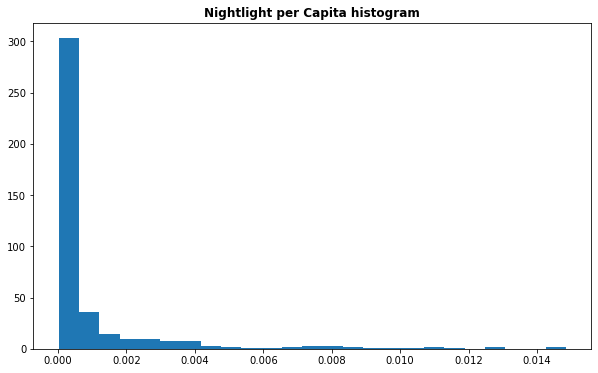

In [37]:
plt.rcParams["figure.figsize"] = (10,6)
plt.hist(data['nightlight_per_capita'],bins = 25);
plt.title('Nightlight per Capita histogram',fontweight = 'bold')

Text(0.5, 1.0, 'Population density histogram')

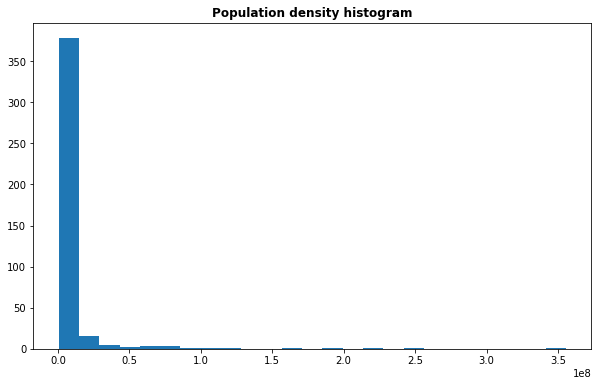

In [38]:
plt.rcParams["figure.figsize"] = (10,6)
plt.hist(data['population_density'],bins = 25);
plt.title('Population density histogram',fontweight = 'bold')

Text(0.5, 1.0, 'MPI histogram')

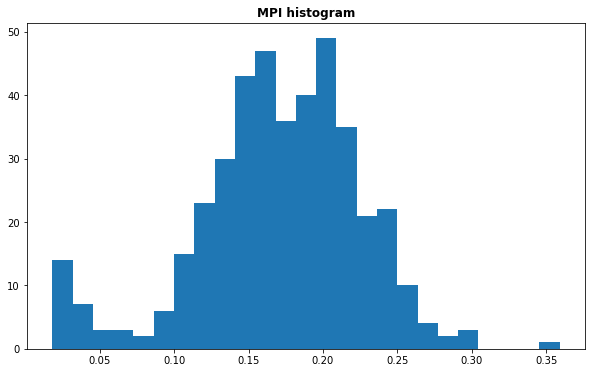

In [39]:
plt.rcParams["figure.figsize"] = (10,6)
plt.hist(data['mpi'],bins = 25);
plt.title('MPI histogram',fontweight = 'bold')

In [40]:
X = data[['nightlight_per_capita','population_density']]
y = data['mpi']

In [41]:
#i
lis1 = []
for i in X:
    lis1.append(pd.Series.corr(data[i],y))
    print('The correlation of mpi with '+i+': ',pd.Series.corr(data[i],y))

The correlation of mpi with nightlight_per_capita:  -0.546978007849899
The correlation of mpi with population_density:  -0.48713563641537977


In [42]:
lis1

[-0.546978007849899, -0.48713563641537977]

In [43]:
#ii
lis2 = []
for i in X:
    lis2.append(pd.Series.corr(np.log(data[i]),y))
    print('The correlation of mpi with log '+i+': ',pd.Series.corr(np.log(data[i]),y))

The correlation of mpi with log nightlight_per_capita:  -0.6053583063186241
The correlation of mpi with log population_density:  -0.6174372888367271


In [44]:
lis2

[-0.6053583063186241, -0.6174372888367271]

In [45]:
#iii
lis3 = []
for i in X:
    lis3.append(pd.Series.corr(data[i],np.log(y)))
    print('The correlation of log mpi with '+i+': ',pd.Series.corr(data[i],np.log(y)))

The correlation of log mpi with nightlight_per_capita:  -0.6604966836916585
The correlation of log mpi with population_density:  -0.6682808064591083


In [46]:
lis3

[-0.6604966836916585, -0.6682808064591083]

In [47]:
#iv
lis4 = []
for i in X:
    lis4.append(pd.Series.corr(np.log(data[i]),np.log(y)))
    print('The correlation of log mpi with log '+i+': ',pd.Series.corr(np.log(data[i]),np.log(y)))

The correlation of log mpi with log nightlight_per_capita:  -0.6383042350797379
The correlation of log mpi with log population_density:  -0.7453312898008178


In [48]:
lis4

[-0.6383042350797379, -0.7453312898008178]

In [70]:
table2 = pd.DataFrame(index = ['nightlight_per_capita','population_density'])

In [71]:
table2['X vs y'] = lis1
table2['log X vs y'] = lis2
table2['X vs log y'] = lis3
table2['log X vs log y'] =lis4

In [75]:
table2['X vs y']

nightlight_per_capita   -0.546978
population_density      -0.487136
Name: X vs y, dtype: float64

In [76]:
table2['log X vs y']

nightlight_per_capita   -0.605358
population_density      -0.617437
Name: log X vs y, dtype: float64

In [77]:
table2['X vs log y']

nightlight_per_capita   -0.660497
population_density      -0.668281
Name: X vs log y, dtype: float64

In [78]:
table2['log X vs log y']

nightlight_per_capita   -0.638304
population_density      -0.745331
Name: log X vs log y, dtype: float64

In [79]:
table2.T

,nightlight_per_capita,population_density
X vs y,-0.546978,-0.487136
log X vs y,-0.605358,-0.617437
X vs log y,-0.660497,-0.668281
log X vs log y,-0.638304,-0.745331


In [49]:
X = pd.DataFrame([np.log(data['population_density']),data['nightlight_per_capita']]).T
y = np.log(data['mpi'])

### Building models

#### Backward_stepwise

In [50]:
def backward_regression(X, y,
                           threshold_out,
                           verbose=False):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return pvalues

In [51]:
backward_regression(X, y,0.05)

population_density       3.531911e-59
nightlight_per_capita    8.738206e-38
dtype: float64

In [52]:
model1 = sm.OLS(y,sm.add_constant(X)).fit()

In [53]:
ypredict1 = model1.predict(sm.add_constant(X))

In [54]:
tvalues,pvalues = ttest_ind(y,ypredict1)
pvalues

0.9999999999997636

#### Ridge Regression

In [55]:
model2 = RidgeCV().fit(X,y)

In [56]:
ypredict2 = model2.predict(X)

In [57]:
stats.coef_pval(model2,X,y)

array([0.        , 0.        , 0.84052572])

In [58]:
tvalues,pvalues = ttest_ind(y,ypredict2)
pvalues

0.9999999999999117

#### Elastic net

In [59]:
model3 = ElasticNetCV().fit(X,y)
stats.coef_pval(model3,X,y)

array([0.        , 0.        , 0.96298745])

In [60]:
ypredict3 = model3.predict(X)

In [61]:
tvalues,pvalues = ttest_ind(y,ypredict3)
pvalues

0.9999999999999823

In [62]:
model = Lasso(alpha = 0.0001).fit(X,y)

In [63]:
yhat = pd.Series(model.predict(X))

In [80]:
yhat.head()

0   -3.539205
1   -2.219374
2   -2.299383
3   -3.312006
4   -1.813874
dtype: float64

In [64]:
pd.Series.corr(y,yhat)

0.8327659180951863

In [65]:
Rsquared = r2_score(y,yhat)

In [66]:
Rsquared

0.6922319568276327

In [67]:
data['logmpi'] = y
data['yhat'] = yhat

In [68]:
data.to_excel('C:/Users/quizd/OneDrive/Desktop/Assignment3/MPIAssignment.xlsx',
                  index=False)